In [1]:
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('survey_results_public.csv',index_col='Respondent')
schema_data = pd.read_csv('survey_results_schema.csv', index_col='Column')


#data = pd.read_csv('C:\\Users\\GAMING_PC\\PANDAS DATA ANALYSIS\\survey_results_public.csv',index_col='Respondent')
#schema_data = pd.read_csv('C:\\Users\\GAMING_PC\\PANDAS DATA ANALYSIS\\survey_results_schema.csv', index_col='Column')


#data = pd.read_csv('survey_results_public.csv')
#schema_data = pd.read_csv('survey_results_schema.csv')

In [3]:
data.head(10)

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,EUR,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,USD,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4
8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,USD,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
9,I am a developer by profession,No,30.0,20,NaN,NaN,NaN,Tunisia,United States dollar,USD,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular.js,jQuery,Just as welcome now as I felt last year,50.0,6,4


In [4]:
data['YearsCode'].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [5]:
data['YearsCode'].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [6]:
data['YearsCode'].replace('Less than 1 year', 0, inplace=True)

In [7]:
data['YearsCode'].replace('More than 50 years', 51, inplace=True)

In [8]:
data['YearsCode']=data['YearsCode'].astype(float)

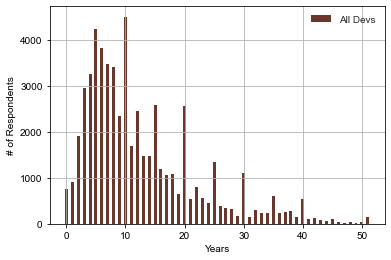

In [9]:
df = data.YearsCode.value_counts().reset_index()
df.columns = ['YearsCode', 'Count']

X= df['YearsCode']
Y= df['Count']
width=0.50
plt.bar(X, Y,width=width, color='#69372C', label='All Devs')
plt.xlabel('Years')
plt.ylabel('# of Respondents')
plt.style.use('seaborn')
plt.grid(True)
plt.legend()

plt.show()


In [10]:
filt=data['Country'] == 'India'
data.loc[filt]['JobSat'].value_counts()

Slightly satisfied                    1570
Very satisfied                        1166
Neither satisfied nor dissatisfied    1031
Slightly dissatisfied                  869
Very dissatisfied                      415
Name: JobSat, dtype: int64

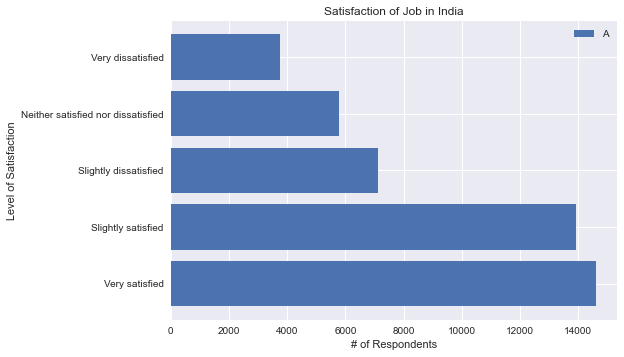

In [11]:
df1 = data.JobSat.value_counts().reset_index()
df1.columns = ['JobSat', 'Count']

X= df1['JobSat']
Y= df1['Count']
width=0.5
plt.barh(X, Y)
plt.xlabel('# of Respondents')
plt.ylabel('Level of Satisfaction')
plt.style.use('seaborn')
plt.grid(True)
plt.legend('All Devs')
plt.title('Satisfaction of Job in India')
plt.show()


In [12]:
schema_data.loc['WelcomeChange']

QuestionText    Compared to last year, how welcome do you feel...
Name: WelcomeChange, dtype: object

In [13]:
data["ConvertedComp"].median()

54049.0

In [14]:
data.describe()

,Age,CompTotal,ConvertedComp,WorkWeekHrs,YearsCode
count,45446.000000,3.482600e+04,3.475600e+04,41151.000000,57684.000000
mean,30.834111,3.190464e+242,1.037561e+05,40.782174,12.709053
std,9.585392,inf,2.268853e+05,17.816383,9.717353
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,24.000000,2.000000e+04,2.464800e+04,40.000000,6.000000
50%,29.000000,6.300000e+04,5.404900e+04,40.000000,10.000000
75%,35.000000,1.250000e+05,9.500000e+04,44.000000,17.000000
max,279.000000,1.111111e+247,2.000000e+06,475.000000,51.000000


In [15]:
data['WelcomeChange'].value_counts(normalize=True)

Just as welcome now as I felt last year                    0.706129
Somewhat more welcome now than last year                   0.095287
A lot more welcome now than last year                      0.060836
Somewhat less welcome now than last year                   0.058748
A lot less welcome now than last year                      0.040449
Not applicable - I did not use Stack Overflow last year    0.038551
Name: WelcomeChange, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

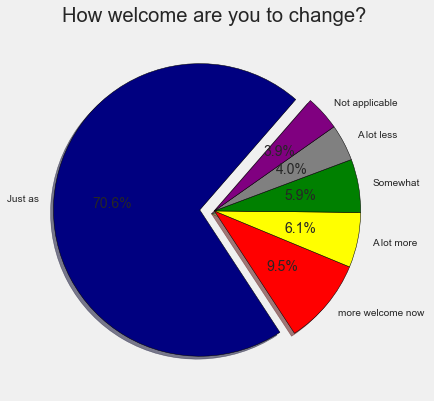

In [16]:
plt.style.use('fivethirtyeight')
slices=[0.706129, 0.095287, 0.060836, 0.058748, 0.040449, 0.038551]
colors=['navy', 'red','yellow','green','grey','purple']
labels= ['Just as', 'more welcome now ', 'A lot more', 'Somewhat','A lot less', 'Not applicable']
explode=[0.1,0,0,0,0,0]
plt.pie(slices, labels=labels, colors=colors, explode=explode, shadow=True, startangle=49, autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.tight_layout()
plt.title('How welcome are you to change?')
plt.show